In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score , recall_score
from imblearn.over_sampling import SMOTE 

data_df = pd.read_csv('INCART 2-lead Arrhythmia Database.csv')
book=pd.read_csv('MIT-BIH Arrhythmia Database new.csv')
print(data_df.shape)
data_df.head()

(175729, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [2]:
x_data = data_df.iloc[:, 2:]
y_label = data_df[['type']]
z_label = data_df[['type']]
z_label.value_counts()
y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
y_label.replace(['N'], 'Normal', inplace=True)

C:\Users\Sa\AppData\Local\Temp\ipykernel_19816\1430154249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
C:\Users\Sa\AppData\Local\Temp\ipykernel_19816\1430154249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['N'], 'Normal', inplace=True)


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y_label)

C:\Users\Sa\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
y_label

,type
0,Normal
1,Normal
2,Normal
3,Arrhythmia
4,Normal
...,...
175724,Arrhythmia
175725,Normal
175726,Normal
175727,Normal


In [5]:
y = pd.DataFrame(Y)  
y.value_counts()
y

,0
0,1
1,1
2,1
3,0
4,1
...,...
175724,0
175725,1
175726,1
175727,1


In [6]:
smote=SMOTE()
x_re,y_re = smote.fit_resample(x_data,y)

In [7]:
y_re.value_counts()

0
0    153546
1    153546
Name: count, dtype: int64

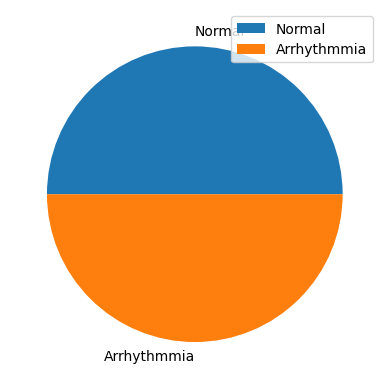

In [8]:
after=y_re.value_counts()
plt.pie(after,labels=['Normal','Arrhythmmia'],explode=[0,0])
plt.legend()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_re, y_re, random_state=101,test_size=0.3)

In [10]:
X_test.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
166496,168,159,0.009353,-0.108045,0.937669,-0.217217,0.000443,33,5,43,...,-1.102926,1,11,36,24,-1.102926,-1.102926,-1.102926,-1.102926,-1.102926
108205,330,230,0.143267,-0.275565,1.747206,-1.041657,-0.116303,27,16,49,...,-0.284703,4,6,17,7,-0.284703,-0.284703,-0.440593,-0.587096,-0.680529
172365,207,168,-0.166467,0.698732,-0.281917,-0.281917,-0.923405,3,8,15,...,-0.218907,4,4,23,15,-0.218907,-0.218907,-0.555404,-0.825737,-0.980557
305472,165,178,0.142197,2.732497,2.283620,2.283620,-0.011100,18,6,26,...,-0.139741,9,10,29,9,-0.139741,-0.140573,-0.171191,-0.294583,-0.503266
227844,127,359,0.090024,2.789373,2.698799,2.698799,0.026280,23,17,41,...,-0.345090,9,13,33,11,-0.345090,-0.361590,-0.413217,-0.511942,-0.645324


In [11]:
#### from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)
print(min_max_scaler.scale_)

#x = x-xmin/xmax-xmin

[0.00218818 0.00229885 0.06768416 0.07941153 0.08538644 0.0842764
 0.09763499 0.00763359 0.00892857 0.00409836 0.01162791 0.09763499
 0.09453222 0.08621611 0.08133818 0.08370927 0.00218818 0.00229885
 0.11448472 0.17645606 0.1548341  0.1641427  0.15036324 0.0078125
 0.00833333 0.0034965  0.01176471 0.15036324 0.12991263 0.12456321
 0.18839662 0.18698386]


In [12]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
y_test.head()

,0
166496,1
108205,1
172365,1
305472,0
227844,0


In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_scaled_df,y_train)

C:\Users\Sa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
y_pred=model.predict(X_test_scaled_df)
y_pred
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.head()

,0
0,1
1,1
2,1
3,0
4,0


In [16]:
accuracy_score(y_test,y_pred)

0.977357589440778

In [17]:
confusion_matrix(y_test,y_pred)

array([[44322,  1511],
       [  575, 45720]], dtype=int64)

In [18]:
recall_score(y_test,y_pred,pos_label=0)

0.9670324875090001

In [19]:
precision_score(y_test,y_pred,pos_label=0)

0.98719290821213

In [20]:
f1_score(y_test, y_pred)

0.9776960417424032

In [21]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9547094249144327

In [56]:
book=pd.read_csv('MIT-BIH Arrhythmia Database new.csv')

In [74]:
xx_data = book.iloc[:, 2:]
yy_label = book[['type']]
zz_label = book[['type']]
zz_label.value_counts()
yy_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
yy_label.replace(['N'], 'Normal', inplace=True)

C:\Users\Sa\AppData\Local\Temp\ipykernel_19816\1618700485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
C:\Users\Sa\AppData\Local\Temp\ipykernel_19816\1618700485.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy_label.replace(['N'], 'Normal', inplace=True)


In [60]:
z_pred=model.predict(xx_data)

In [70]:
yy_pred_df=pd.DataFrame(z_pred)

In [72]:
yy_pred_df

,0
0,0
1,1
2,1
3,1
4,1
...,...
97102,1
97103,1
97104,1
97105,1


In [78]:
yy_pred_df.value_counts()

0
1    93811
0     3296
Name: count, dtype: int64

In [82]:
confusion_matrix(yy_label,yy_pred_df)

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Arrhythmia' 'Normal'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.